# Line Plots:

In [1]:
%matplotlib notebook

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

There are a couple of things new about line plots compared to scatter plots
## Index is X-axes:
We can give only y-axes values to our plot call, no x-axes values. Instead the plot function is smart enough to figure out what we want is to use index of the series as x value.

<IPython.core.display.Javascript object>


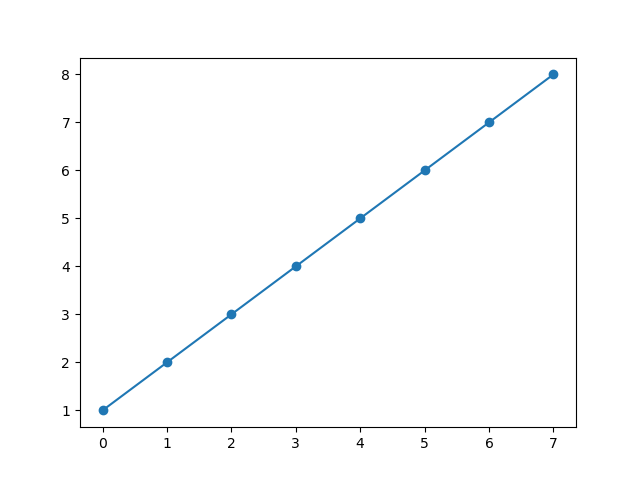

In [5]:
linear_data=np.array([1,2,3,4,5,6,7,8])
plt.figure()
plt.plot(linear_data,"-o")

## Two different Series:
You can see below plot identifies the linear_data and exponential data as the two different series of data and that the color of serries are different including the data points and lines between data points. this is different from the scatterplot which required us to label the lines directly.

<IPython.core.display.Javascript object>


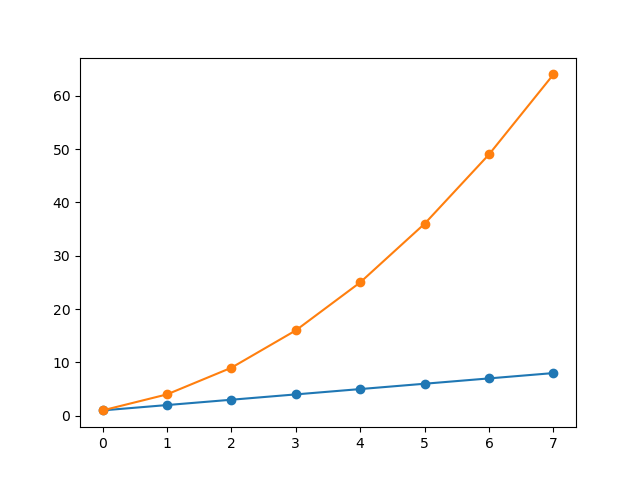

In [6]:
linear_data=np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2
plt.figure()
plt.plot(linear_data,"-o",exponential_data,"-o")

## task mat plot lib:
Like all good python libraries matplotlib invents a string based mini language for commonly used formatting for instance we could use s inside of formatting string which would plot another point using a square marker, or we could use a series of dashes and dots to identify that a line should be dashed instead of solid.

<IPython.core.display.Javascript object>


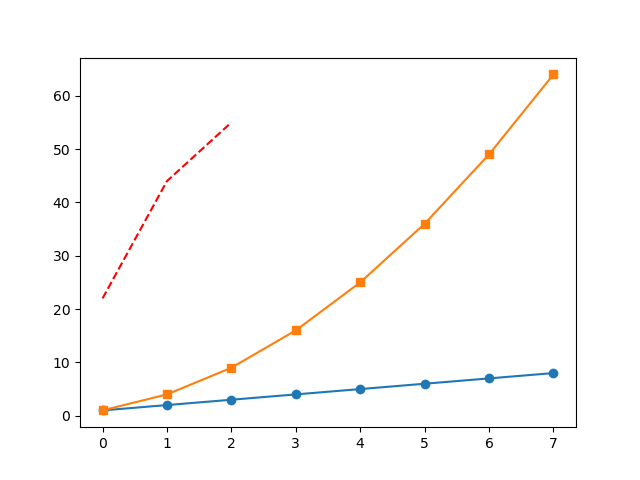

In [11]:
linear_data=np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2
plt.figure()
plt.plot(linear_data,"-o",exponential_data,"-s")
plt.plot([22,44,55], '--r') # r means color red

## Labeling and adding legends:
We could use regular axes function creating labels for the axes and for the figure as a whole and we can create a legend too, But note that since we did not label the data points as we did with the scatter plot. we need to create legend entries when we add legend itself.

<IPython.core.display.Javascript object>


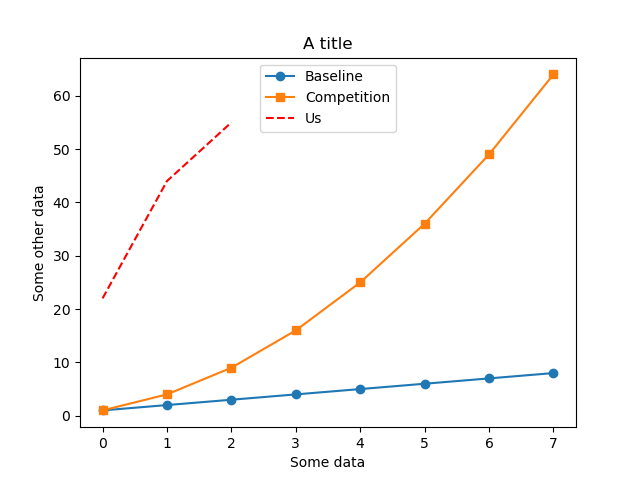

In [12]:

plt.figure()
plt.plot(linear_data,"-o",exponential_data,"-s")
plt.plot([22,44,55], '--r') # r means color red

plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Baseline', 'Competition', 'Us'])

## fill_between():
This funtion is not specific to line plots, but you can see it commonly used with these plots. Let's imagine we want to highlight the difference between the orrange and blue curves. We could tell the access to paint a color between these series using fill_between function.
- first we get the current axes object.
- then we indicate the range of x-values we want to be filled, we did not specify any x-values we call to plot, so we'll just use the same range  of data points it is already using.
- Then we'll put in lower bounds and upper bounds.
- Now we specify the color we want painted.
- And for fun we'll add a transparency value.

<IPython.core.display.Javascript object>


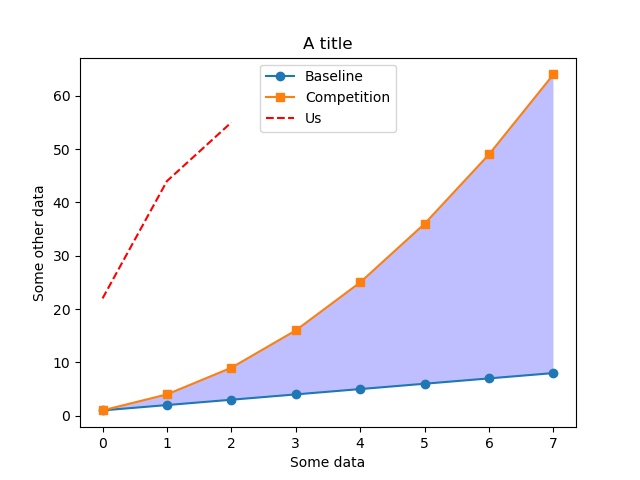

In [20]:
plt.figure()
plt.plot(linear_data,"-o",exponential_data,"-s")
plt.plot([22,44,55], '--r') # r means color red

plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Baseline', 'Competition', 'Us'])
plt.gca().fill_between(range(len(linear_data)), 
                       linear_data, exponential_data, 
                       facecolor='blue', 
                       alpha=0.25)

## datetime on x-axis:
Let's change our x-axis to a series of date time instances in one day travels. Lets 1st create a new image. Then numpy arange function which we saw previously is really helpful at sampling some dates for us.

<IPython.core.display.Javascript object>


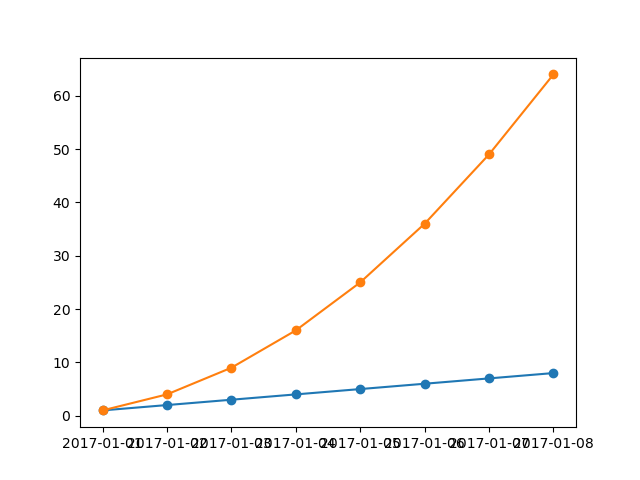

In [29]:
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

### Note:
Wow that that did get us our required result unlike in coursera lecture where we did not get proper dates in x-axis. probably because of some newer update fixed this problem. You can skip mapping method explained next to fix datetime but as we are following coursera lecture we'll check that out in case you did not get the required result like me.

Let's covert it to_datetime

<IPython.core.display.Javascript object>


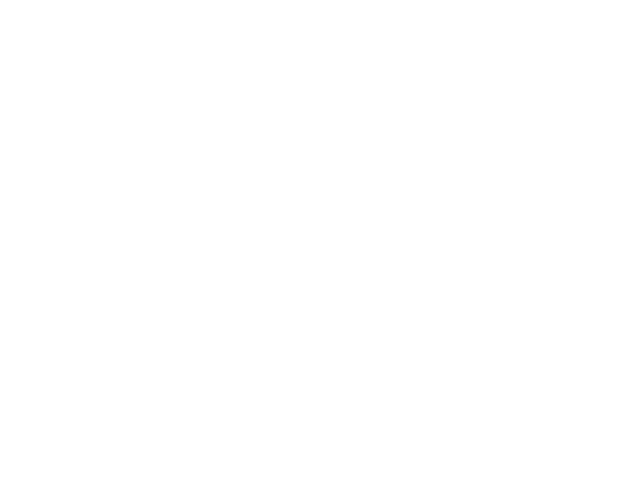

RuntimeError: matplotlib does not support generators as input

In [30]:
import pandas as pd

plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = map(pd.to_datetime, observation_dates) # trying to plot a map will result in an error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

### Reason for error:
Map function returns an iterable but plot function does not support an iterable so we'll have to convert output of map to list.

<IPython.core.display.Javascript object>


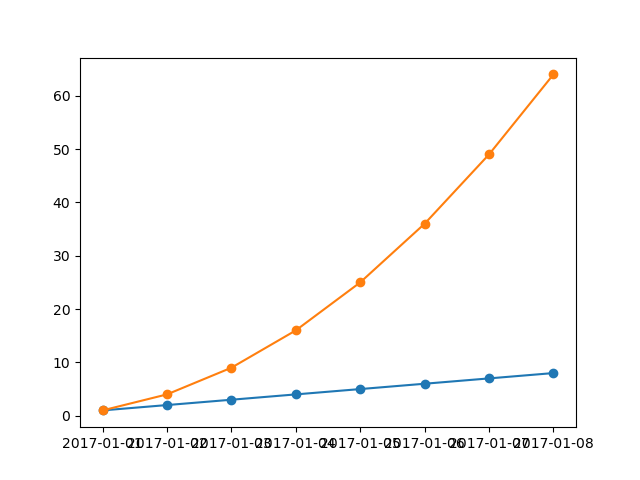

In [31]:
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates)) # convert the map to a list to get rid of the error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

This is a pretty decent looking figure but dates are overlapping and difficult to read. There are multiple ways to handle this problem for example we can remove year from dates as they are all 2017 and specify the year in x-label. This is pretty reasonable but there is a useful feature in matplotlib. 
- 1st we shall get axes object using GCA.
- We can get single axis from axes object using its x-axes and y-axes properties.
- There are lots of interesting properties of the axes object and we'll use some of them in the assignment e.g. we can get grid lines, the tick locations for both major and minor ticks and so on.
- Just like all artists an axes has a bunch of children which are themselves artists.


In [37]:
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)
rec_gc(plt.gca().xaxis)

XAxis(80.0,52.8)
    Text(0.5, 23.52222222222222, '')
    Text(1, 24.911111111111108, '')
        Line2D((17167,0))
        Line2D()
        Line2D()
        Text(17167.0, 0, '2017-01-01')
        Text(17167.0, 1, '2017-01-01')
        Line2D((17168,0))
        Line2D()
        Line2D()
        Text(17168.0, 0, '2017-01-02')
        Text(17168.0, 1, '2017-01-02')
        Line2D((17169,0))
        Line2D()
        Line2D()
        Text(17169.0, 0, '2017-01-03')
        Text(17169.0, 1, '2017-01-03')
        Line2D((17170,0))
        Line2D()
        Line2D()
        Text(17170.0, 0, '2017-01-04')
        Text(17170.0, 1, '2017-01-04')
        Line2D((17171,0))
        Line2D()
        Line2D()
        Text(17171.0, 0, '2017-01-05')
        Text(17171.0, 1, '2017-01-05')
        Line2D((17172,0))
        Line2D()
        Line2D()
        Text(17172.0, 0, '2017-01-06')
        Text(17172.0, 1, '2017-01-06')
        Line2D((17173,0))
        Line2D()
        Line2D()
        Text(17173.0, 

### get_ticklabels() and set_rotation():
- We can access the text of the ticsising the get_ticklabels() function and we can iterate through these texts.
- We can rotate the text using set_rotation() function.

<IPython.core.display.Javascript object>


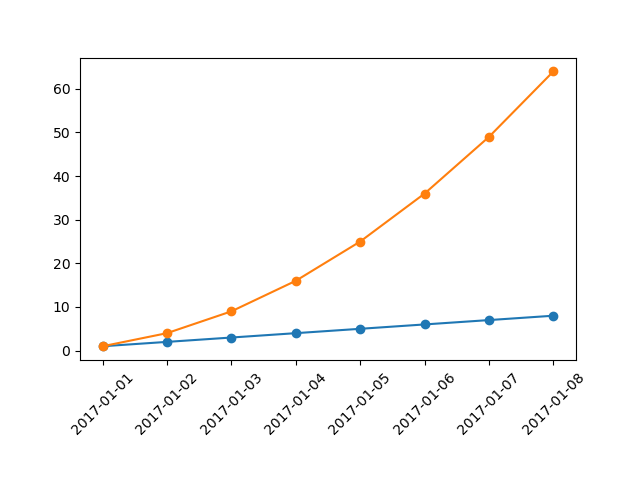

In [40]:
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates)) # convert the map to a list to get rid of the error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)

In [41]:
x.get_ticklabels()

[Text(17167.0, 0, '2017-01-01'),
 Text(17168.0, 0, '2017-01-02'),
 Text(17169.0, 0, '2017-01-03'),
 Text(17170.0, 0, '2017-01-04'),
 Text(17171.0, 0, '2017-01-05'),
 Text(17172.0, 0, '2017-01-06'),
 Text(17173.0, 0, '2017-01-07'),
 Text(17174.0, 0, '2017-01-08')]

adjust the subplot so the text doesn't run off the image

In [42]:
plt.subplots_adjust(bottom=0.25)

<IPython.core.display.Javascript object>


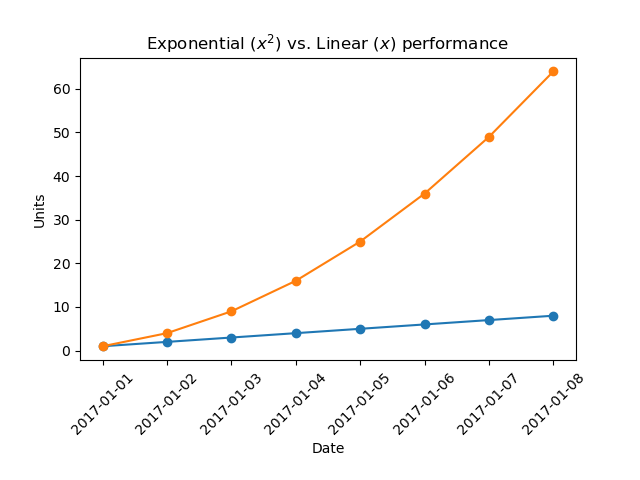

Text(0.5, 1.0, 'Exponential vs. Linear performance')

In [43]:
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates)) # convert the map to a list to get rid of the error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
plt.subplots_adjust(bottom=0.25)
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Exponential vs. Linear performance')

In [44]:
# you can add mathematical expressions in any text element
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance")

Text(0.5, 1.0, 'Exponential ($x^2$) vs. Linear ($x$) performance')

Note: This is LateX math mode which we can enter through $ sign